## Phishing Website Detection using Machine Learning

In [ ]:
pip install sklearn_json

## Importing Libraries

In [ ]:
import pandas as pd
import json
#import dump
import sklearn_json as skljson
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and reading the dataset

In [ ]:
data = pd.read_csv('urldata.csv')

#displaying the first 10 rows
data.head(5)


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,tenisuzivo.com,0,0,0,1,0,0,0,0,0
1,cafesydney.com,0,0,0,1,0,0,0,0,0
2,nurseanywhere.com,0,0,0,1,0,0,0,0,0
3,dragees.fr,0,0,0,1,0,0,0,0,0
4,tulliehouse.co.uk,0,0,0,1,0,0,0,0,0


In [ ]:
#displaying data in ana easier manner to read
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Domain,tenisuzivo.com,cafesydney.com,nurseanywhere.com,dragees.fr,tulliehouse.co.uk,psychology.org,visitphoenix.com,saigonrailway.com.vn,bebek.com,osteraker.se
Have_IP,0,0,0,0,0,0,0,0,0,0
Have_At,0,0,0,0,0,0,0,0,0,0
URL_Length,0,0,0,0,0,0,0,0,0,0
URL_Depth,1,1,1,1,1,1,1,1,1,1
Redirection,0,0,0,0,0,0,0,0,0,0
https_Domain,0,0,0,0,0,0,0,0,0,0
TinyURL,0,0,0,0,0,0,1,0,0,0
Prefix/Suffix,0,0,0,0,0,0,0,0,0,0
Label,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Displaying the shape of the data set

data.shape

(10000, 10)

In [ ]:
#Displaying a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   Label          10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


## Data Preprocessing
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
#Displaying a stastical summary of the dataset
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.0,0.029200,0.190600,1.493800,0.009600,0.000500,0.07650,0.106800,0.500000
std,0.0,0.168375,0.392794,1.247524,0.097513,0.022356,0.26581,0.308874,0.500025
min,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.500000
75%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,0.0,1.000000,1.000000,13.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. This resulted in the decision to drop the  *'Domain'* column from the dataset.

In [ ]:
#Dropping the Domain column
data = data.drop(['Domain'], axis = 1).copy()

This leaves the dataset with 16 features & a target column.

In [ ]:
#Counting and checking for null values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
Label            0
dtype: int64

To have the same range of feature values while splitting the data into training & testing sets, we need to shuffle the data

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,0,1,0,0,0,0,0
1,0,0,1,5,0,0,0,0,1
2,0,1,1,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,1


**Quick observation**: The dataset has no null values. So further processing will not be done such as replace or deleting null rows. data is ready for traning, before training we visualise the data

## Visually Displaying data

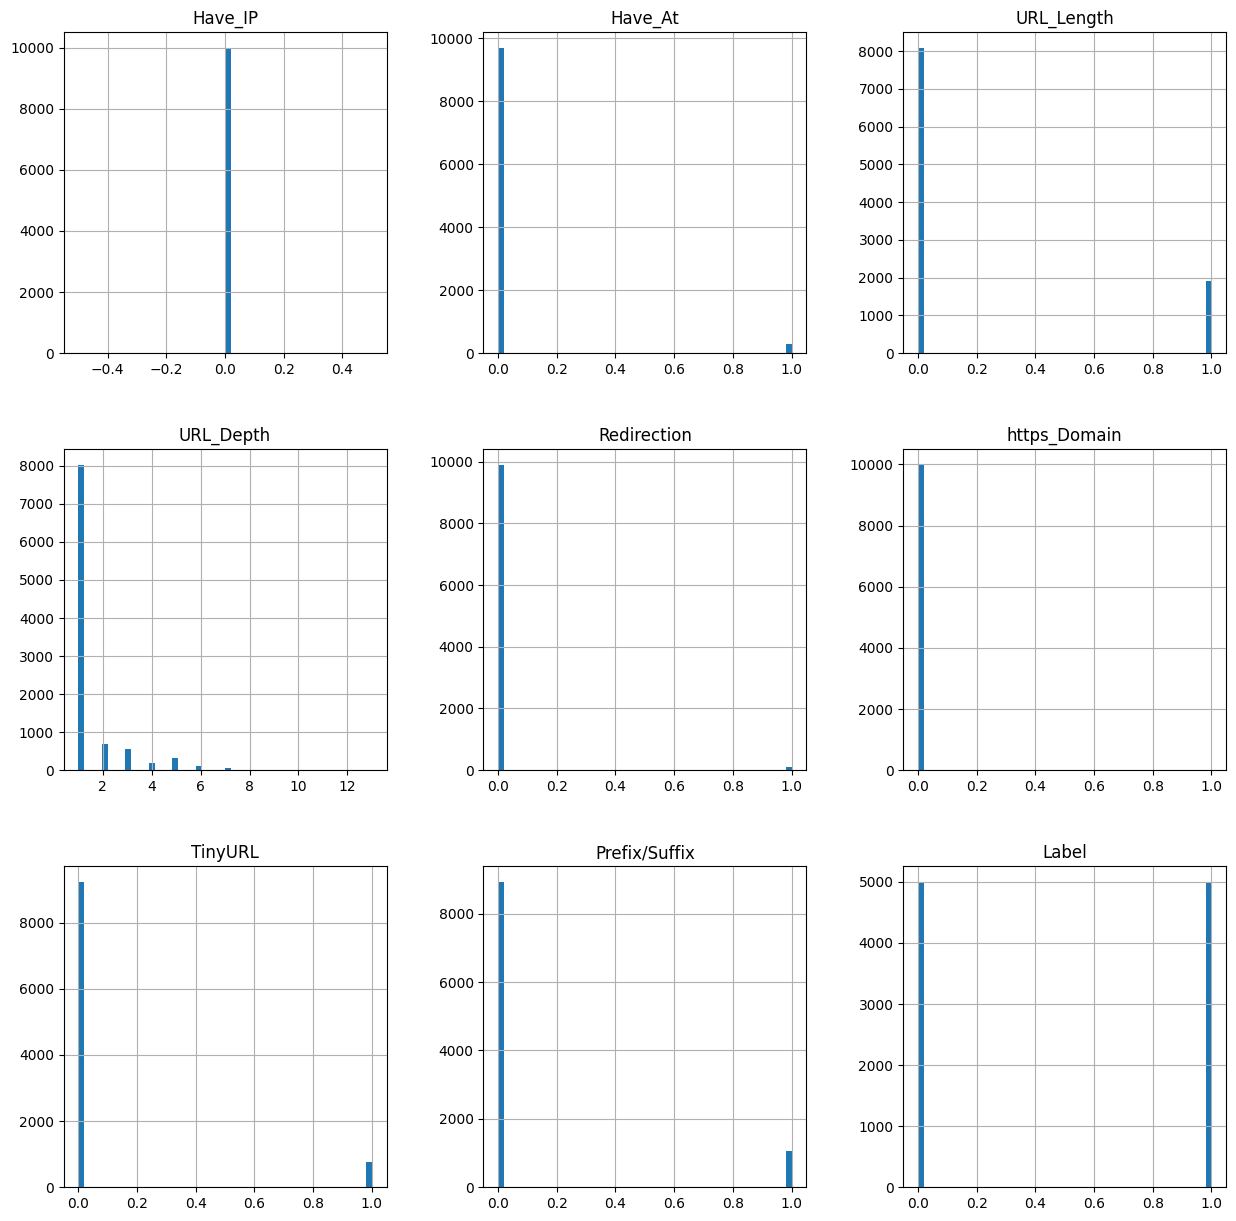

In [ ]:
#Plotting the data distribution with a histogram
data.hist(bins = 50,figsize = (15,15))
plt.show()

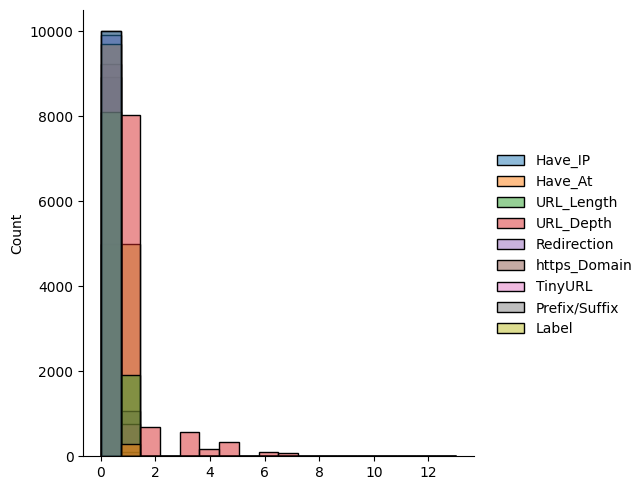

In [ ]:
#overall distribution of continuous data variables
plot = sns.displot(data)

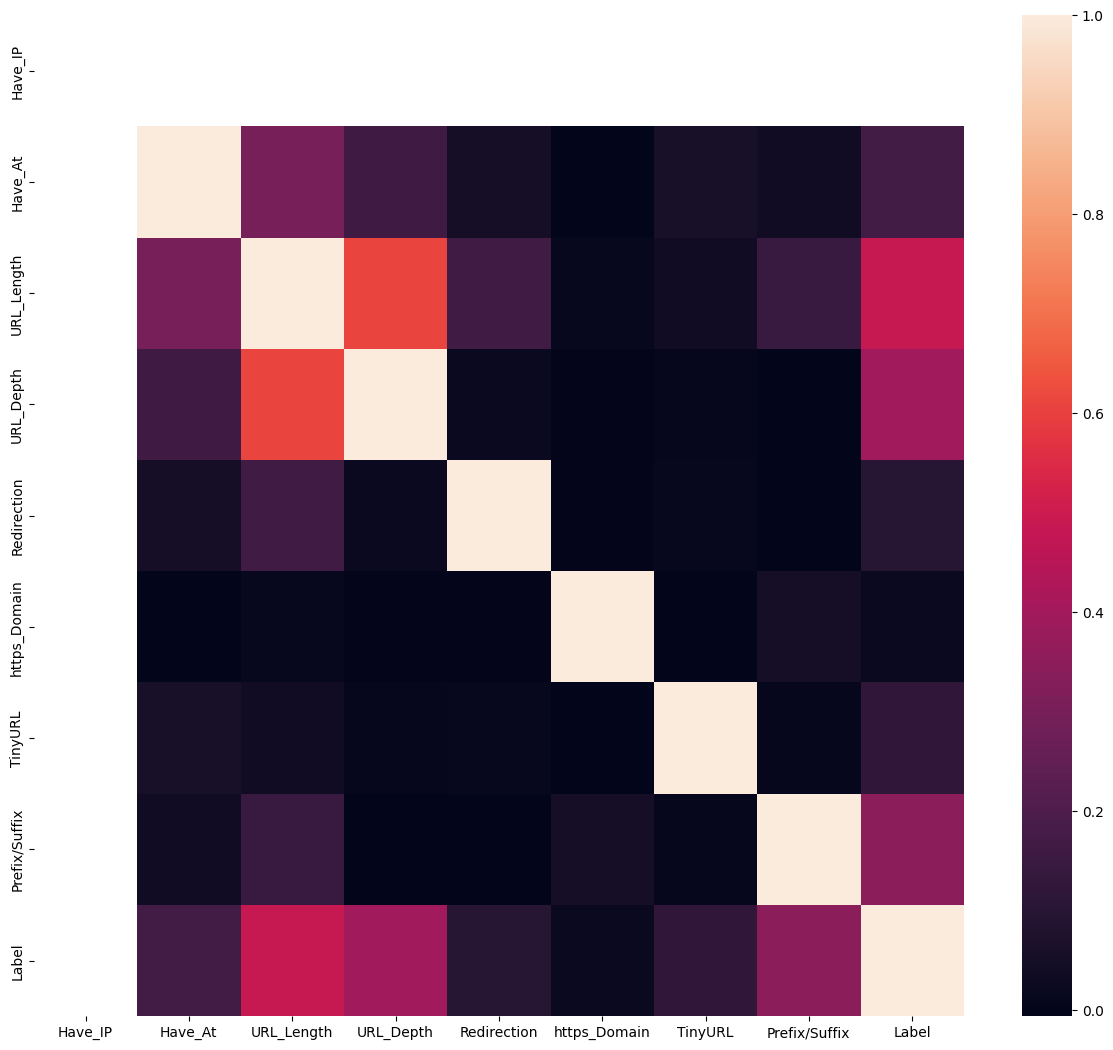

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

<Axes: >

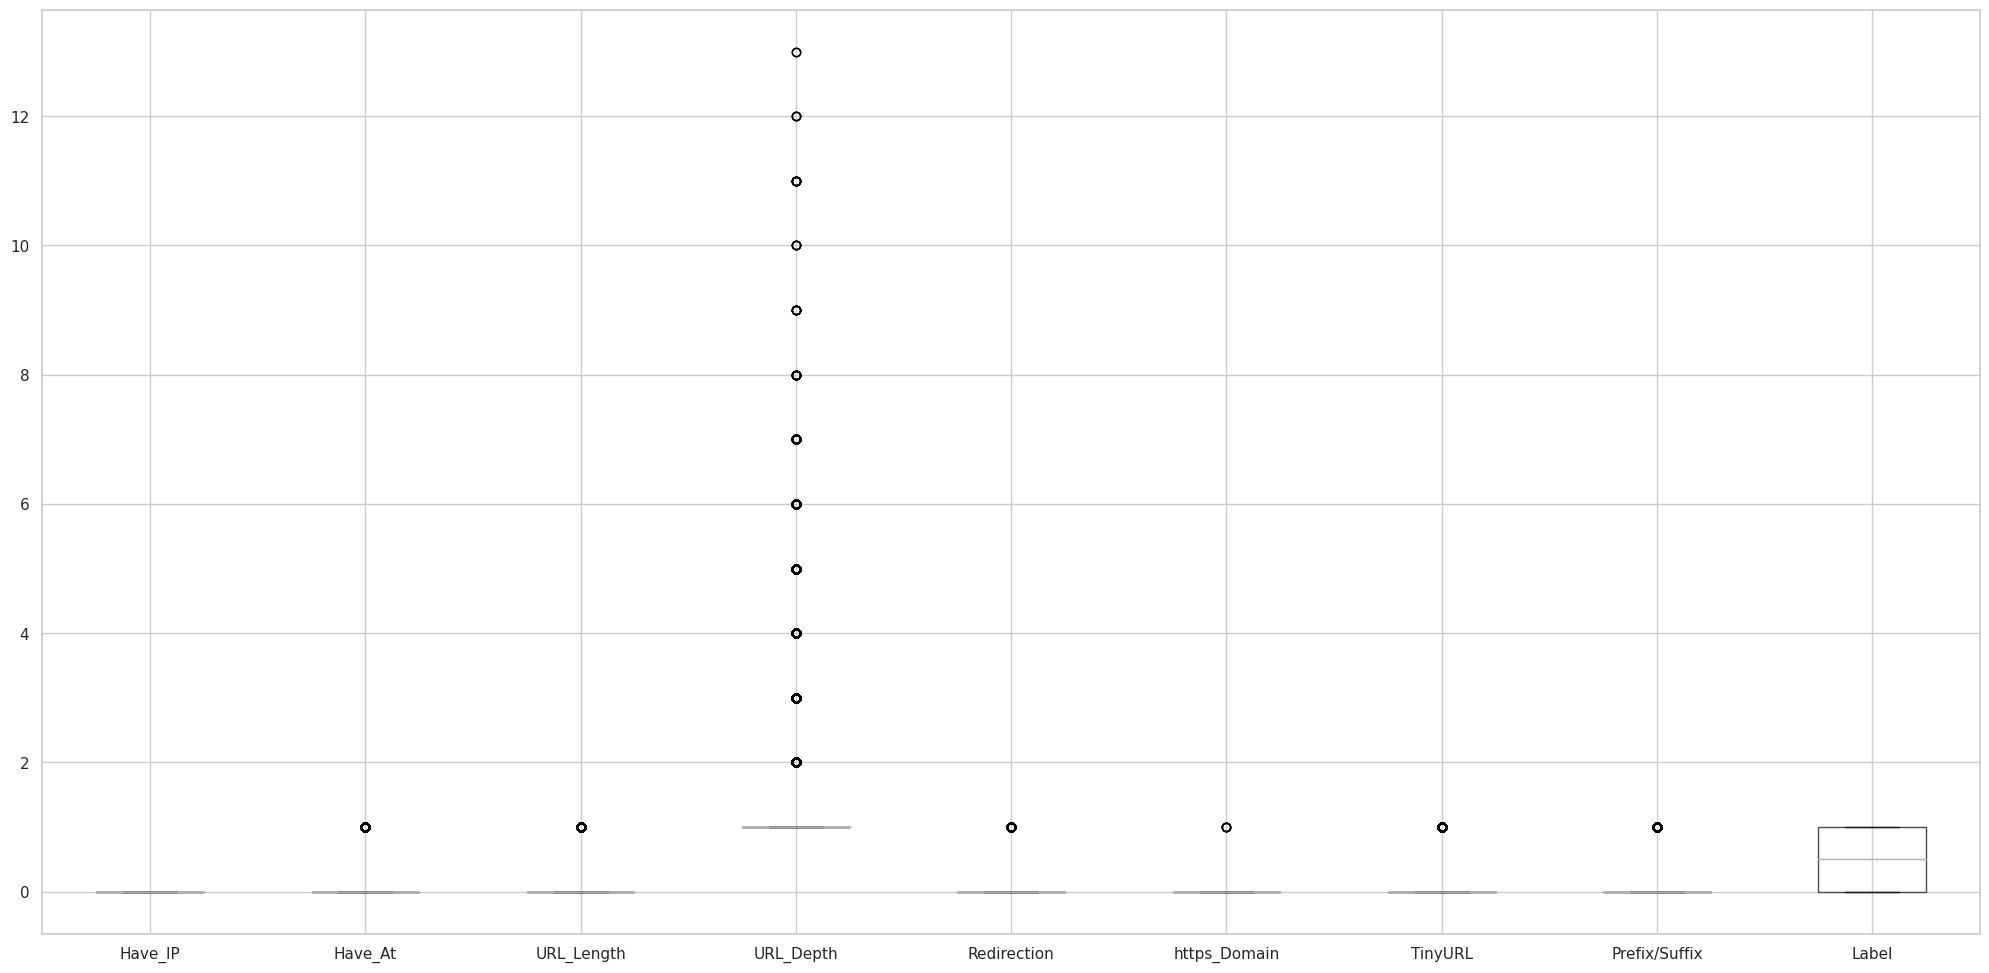

In [ ]:
sns.set(style="whitegrid")
data.boxplot(figsize=(25,12))

## Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)

## Machine Learning Models

From the dataset above, We have learnt that this is a supervised machine learning.
This dataset uses a  classification problem,  it has input URL classified as phishing (1) or legitimate (0).
The supervised machine learning models (classification) considered to train the dataset in this notebook are:
    
* Decision Tree
* RandomForestClassifiers
* KNeighborsClassifier

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

tree_score=tree.score(X_test, y_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on the Model: ",tree_score)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(y_test, y_test_tree))
print(metrics.confusion_matrix(y_test, y_test_tree))

Decision Tree: Accuracy on the Model:  0.833
Decision Tree: Accuracy on training Data: 0.822
Decision Tree: Accuracy on test Data: 0.833
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1036
           1       0.95      0.69      0.80       964

    accuracy                           0.83      2000
   macro avg       0.86      0.83      0.83      2000
weighted avg       0.86      0.83      0.83      2000

[[999  37]
 [297 667]]


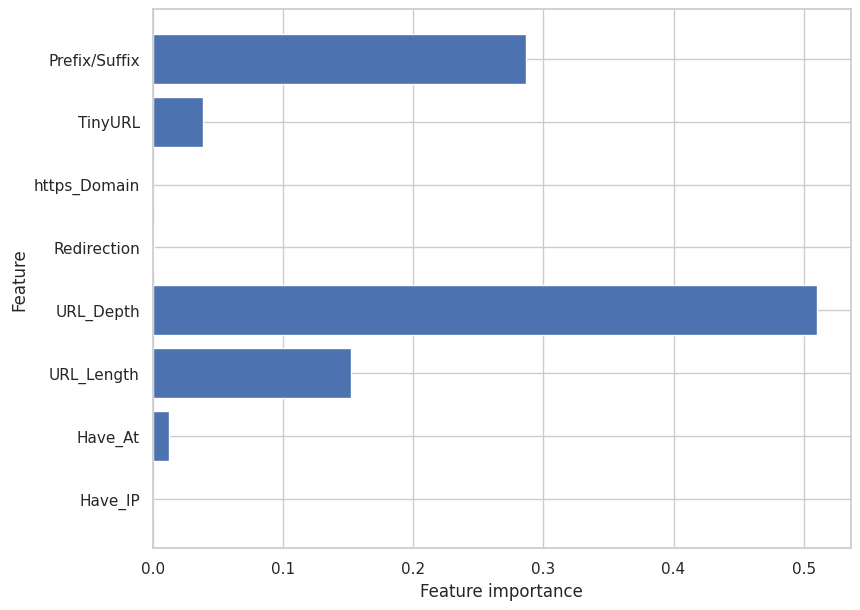

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## Random Forest Classifier

In [ ]:
# instantiate the model
forest = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
# fit the model
forest.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
model_score=forest.score(X_test, y_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on the Model: ",model_score)
print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print(metrics.classification_report(y_test, y_test_forest))
print(metrics.confusion_matrix(y_test, y_test_forest))

Random forest: Accuracy on the Model:  0.8335
Random forest: Accuracy on training Data: 0.823
Random forest: Accuracy on test Data: 0.834
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1036
           1       0.95      0.69      0.80       964

    accuracy                           0.83      2000
   macro avg       0.86      0.83      0.83      2000
weighted avg       0.86      0.83      0.83      2000

[[999  37]
 [296 668]]


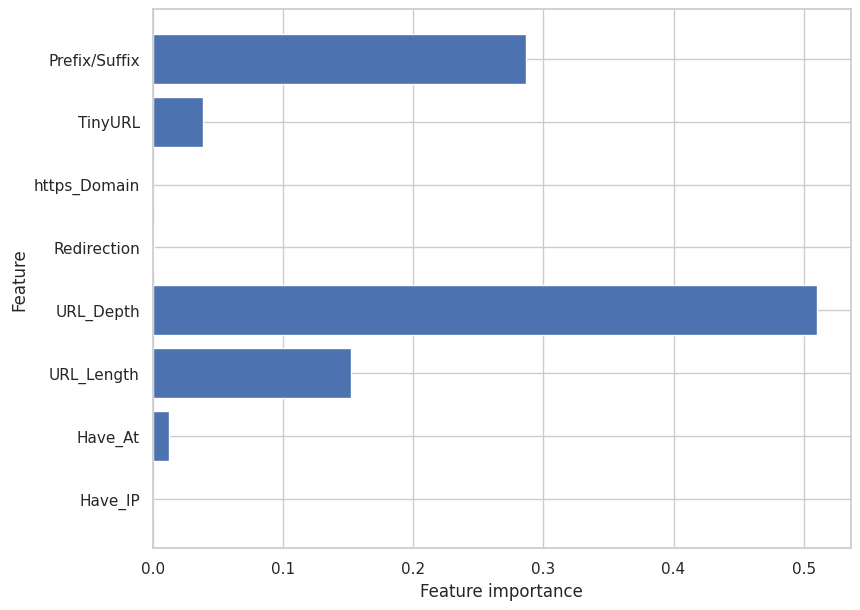

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random forest', acc_train_forest, acc_test_forest)

## KNeighborsClassifier

In [ ]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors =5)
# fit the model
knn.fit(X_train,np.ravel(y_train,order='C'))

#predicting the target value from the model for the samples
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)
model_score=knn.score(X_test, y_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("KNeighborsClassifier: Accuracy on the Model: ",model_score)
print("KNeighborsClassifier: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNeighborsClassifier: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print(metrics.classification_report(y_test, y_test_knn))
print(metrics.confusion_matrix(y_test, y_test_knn))

KNeighborsClassifier: Accuracy on the Model:  0.482
KNeighborsClassifier: Accuracy on training Data: 0.504
KNeighborsClassifier: Accuracy on test Data: 0.482
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1036
           1       0.48      1.00      0.65       964

    accuracy                           0.48      2000
   macro avg       0.24      0.50      0.33      2000
weighted avg       0.23      0.48      0.31      2000

[[   0 1036]
 [   0  964]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


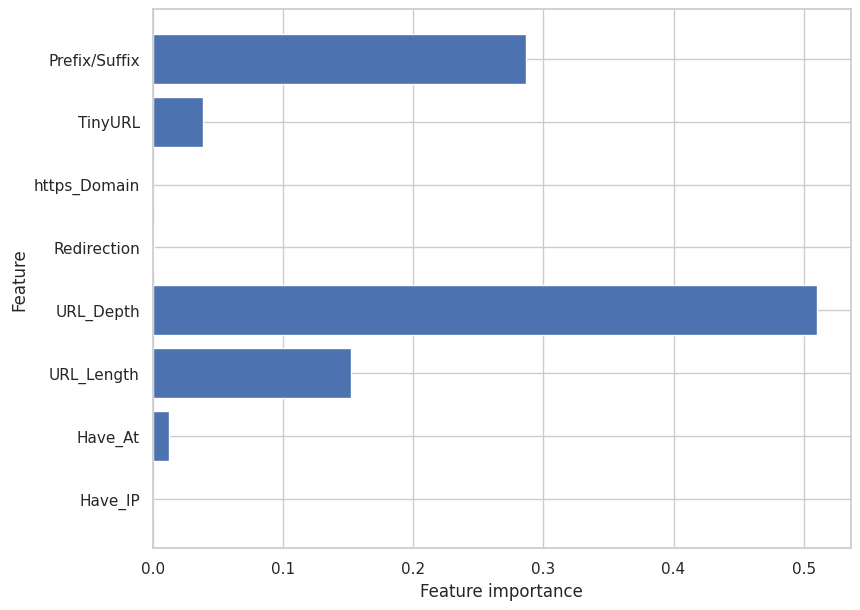

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('KNeighborsClassifier', acc_train_knn, acc_test_knn)

## Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.822,0.833
1,Random forest,0.822,0.834
2,KNeighborsClassifier,0.504,0.482


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random forest,0.822,0.834
0,Decision Tree,0.822,0.833
2,KNeighborsClassifier,0.504,0.482


From the above comparision, it is clear that the Random Forest Classifier works well with this dataset. and can be used to further study the problem

In [ ]:
#Export model to json
#skljson.to_json(forest, 'classifier.json')